In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

gros_pd = pd.DataFrame()
for nb_features in range(1,29):
    df = pd.read_csv(f'../data/nested_CV_checker_{nb_features}_ft.csv', index_col = 0)
    df['nb_features'] = nb_features
    gros_pd = pd.concat([gros_pd,df.reset_index()])


(-0.15, 0.5)

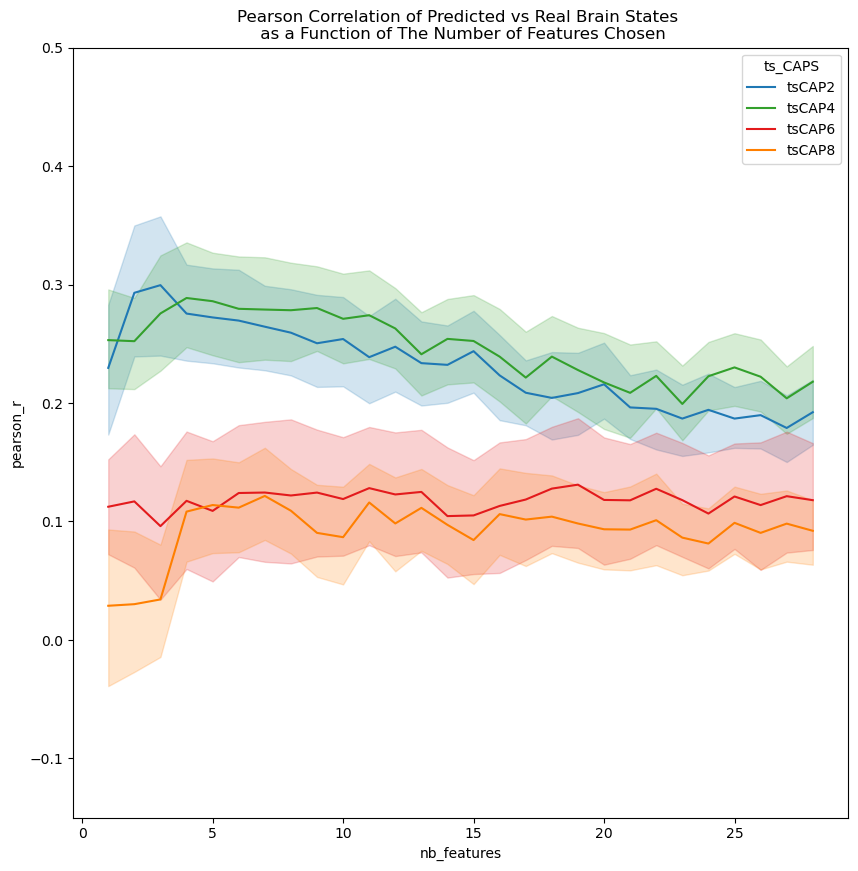

In [5]:
caps = [f'tsCAP{c}'  for c in range(9) if c%2 == 0]
petit_pd = gros_pd.groupby(['subject','ts_CAPS','nb_features']).mean('pearson_r').reset_index()
selected_caps = petit_pd[petit_pd['ts_CAPS'].isin(caps)]
figure = plt.figure(figsize=(10,10))
sns.lineplot(x="nb_features", y="pearson_r",
             hue="ts_CAPS",
             data=selected_caps,
             palette="Paired",
             errorbar=('ci',68),
             #alpha = 1,
             hue_order=[c  if c in caps else '' for c in gros_pd['ts_CAPS'].unique()]
             )
plt.title('Pearson Correlation of Predicted vs Real Brain States \n as a Function of The Number of Features Chosen')

plt.ylim(-0.15,0.5)

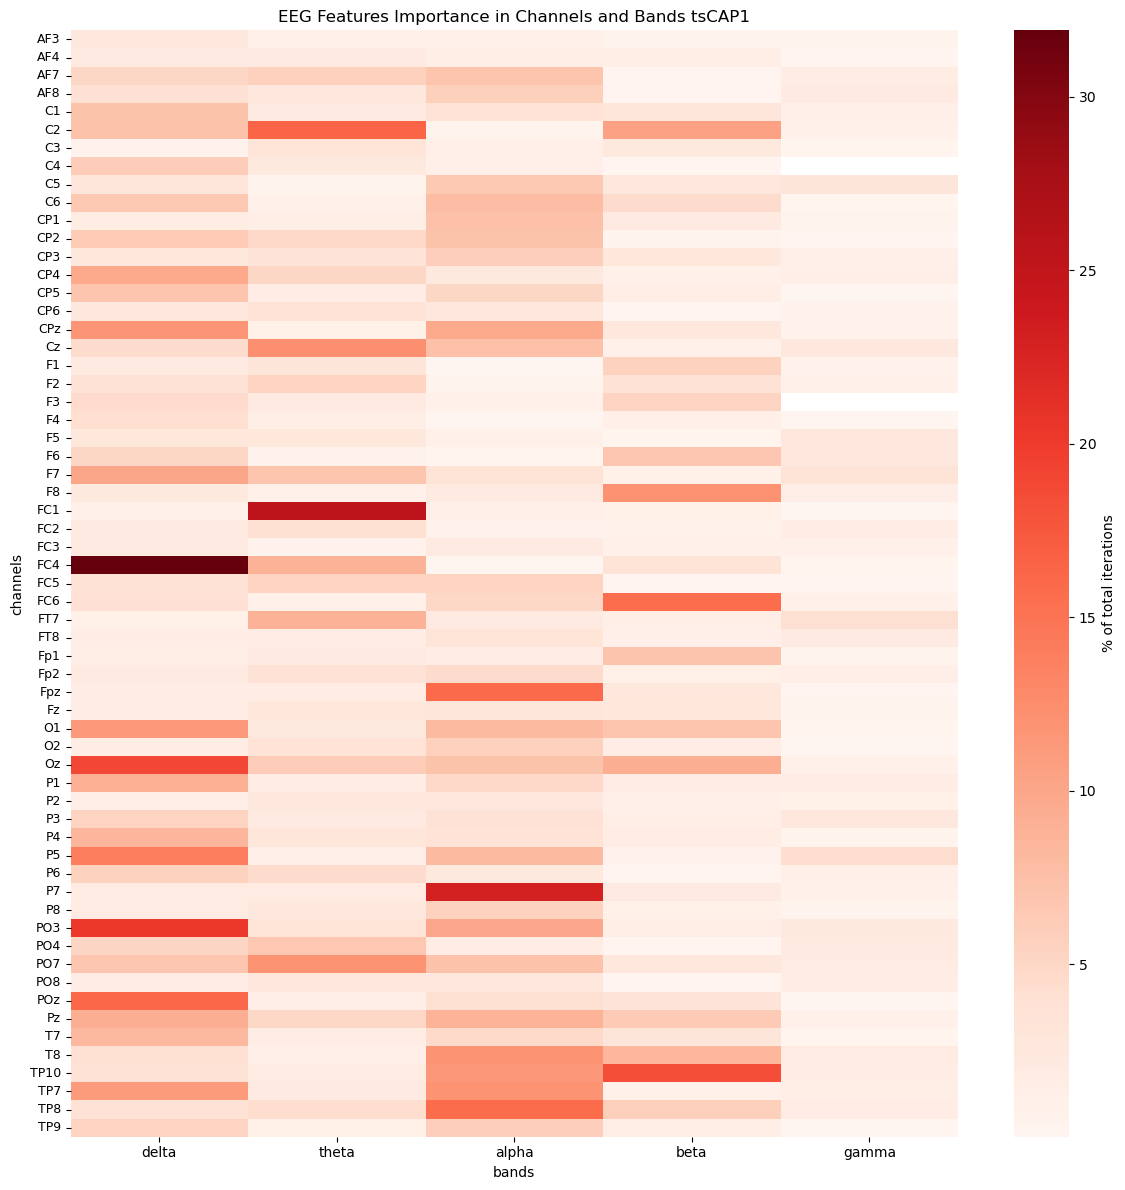

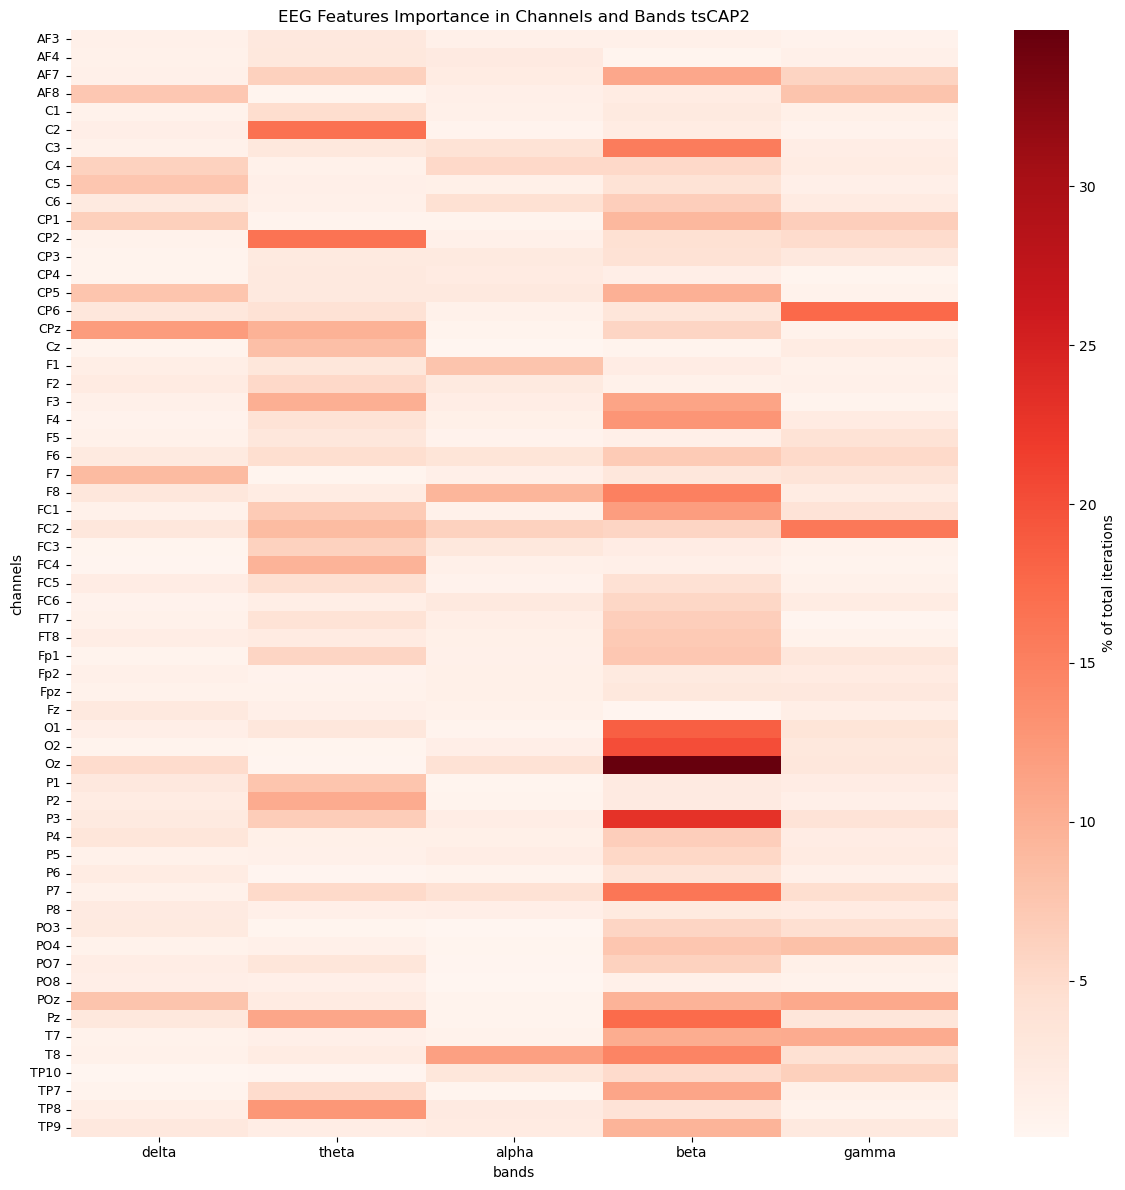

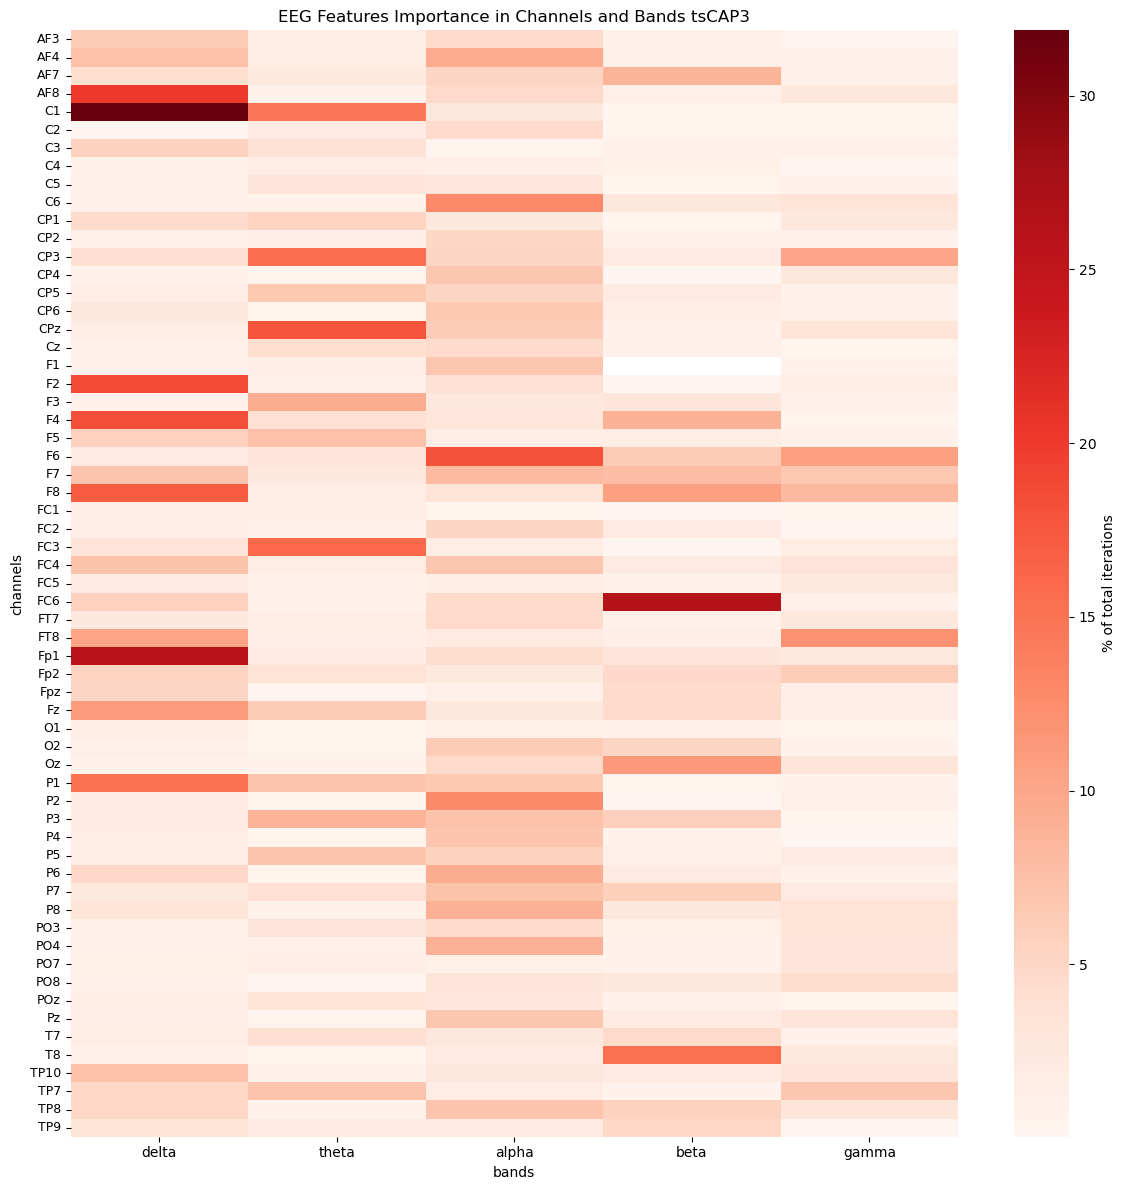

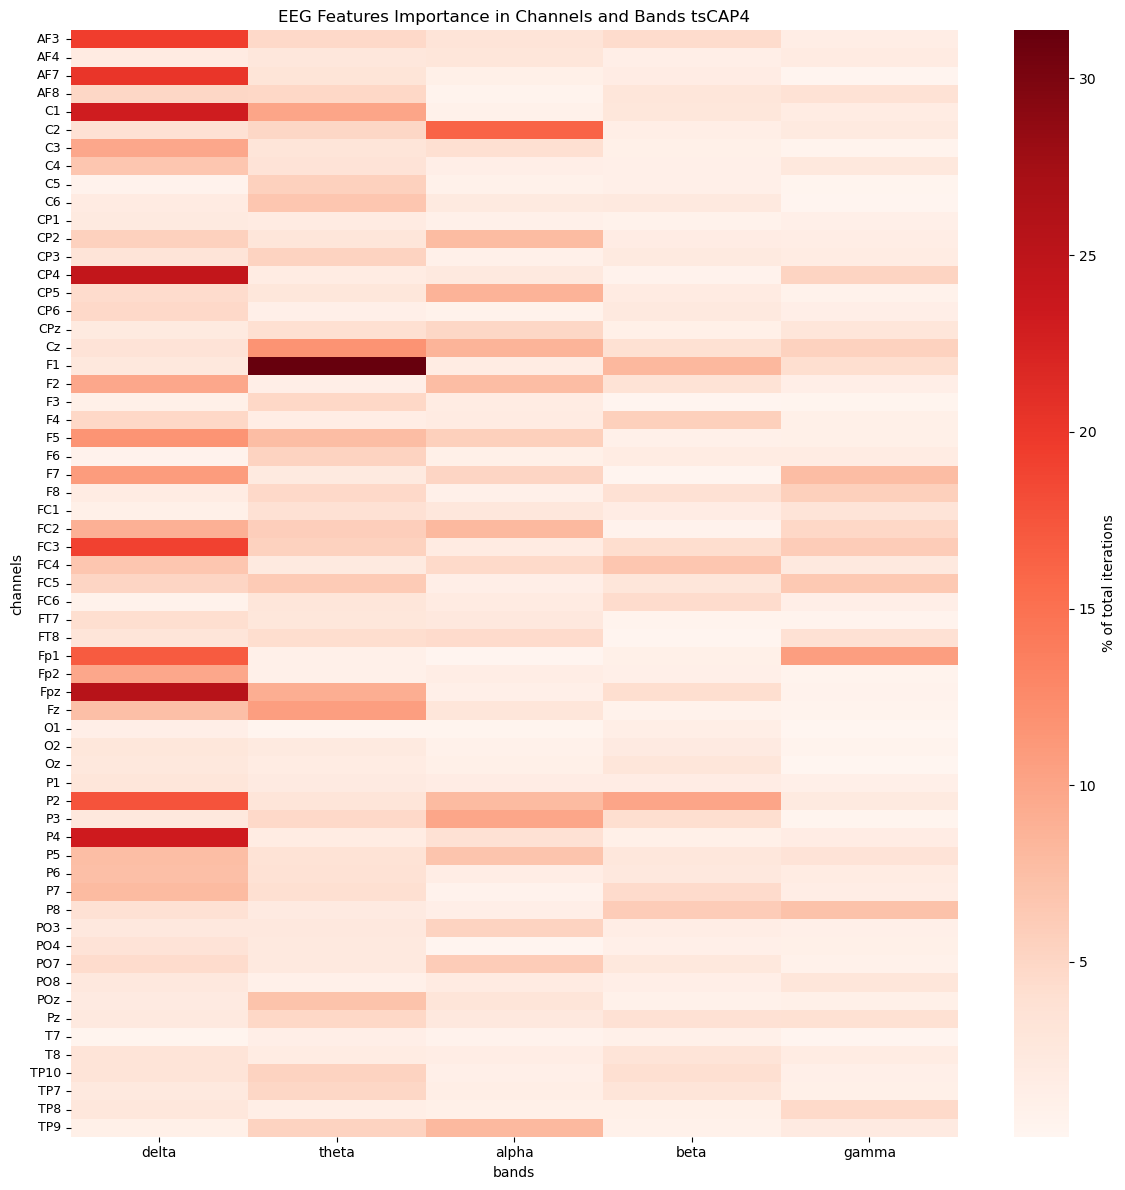

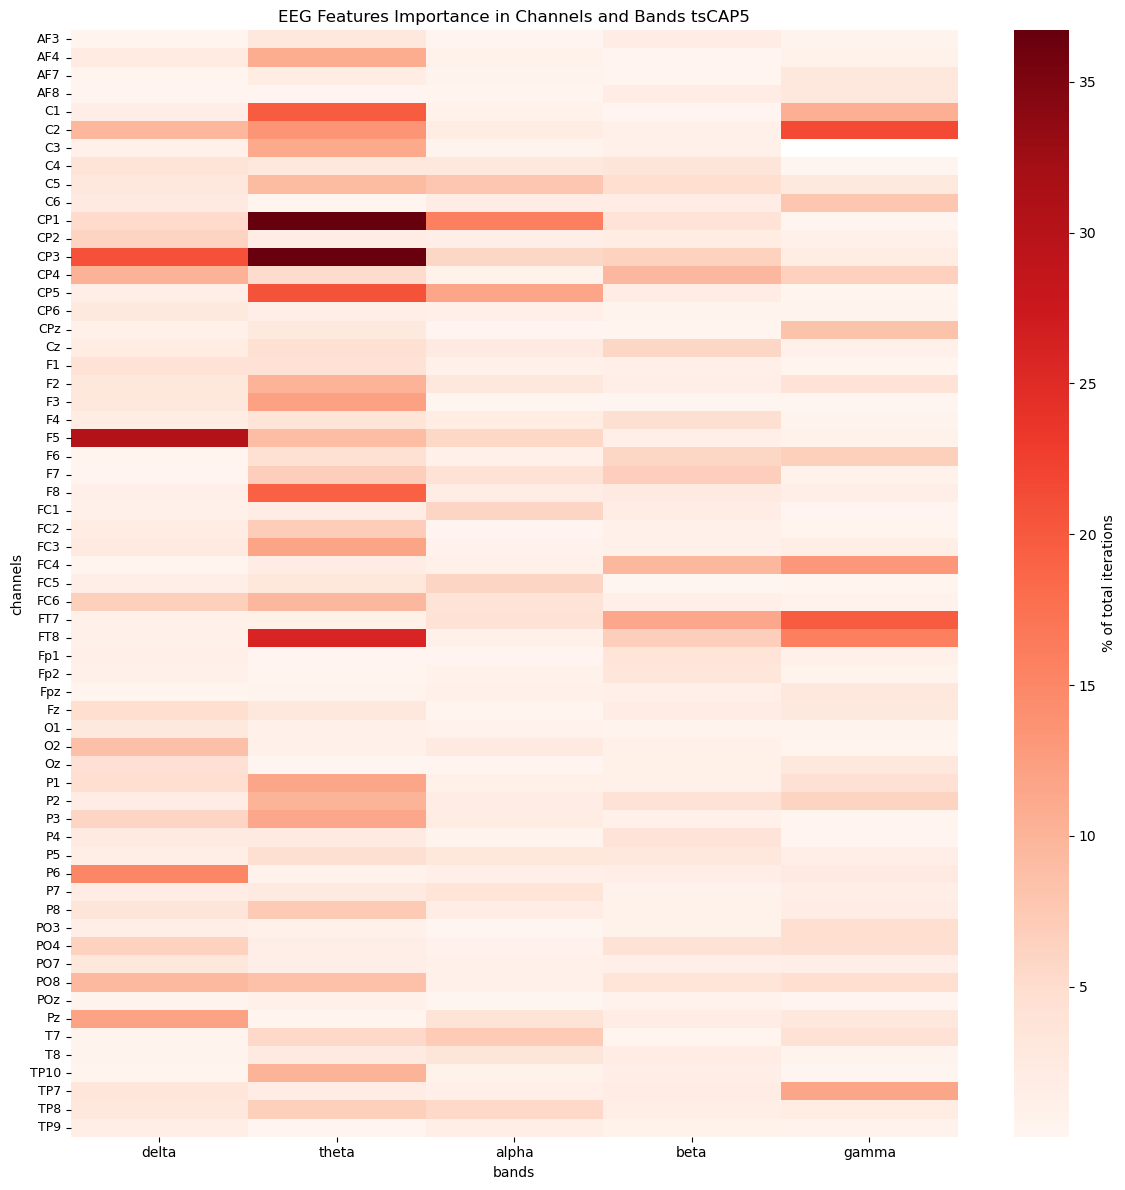

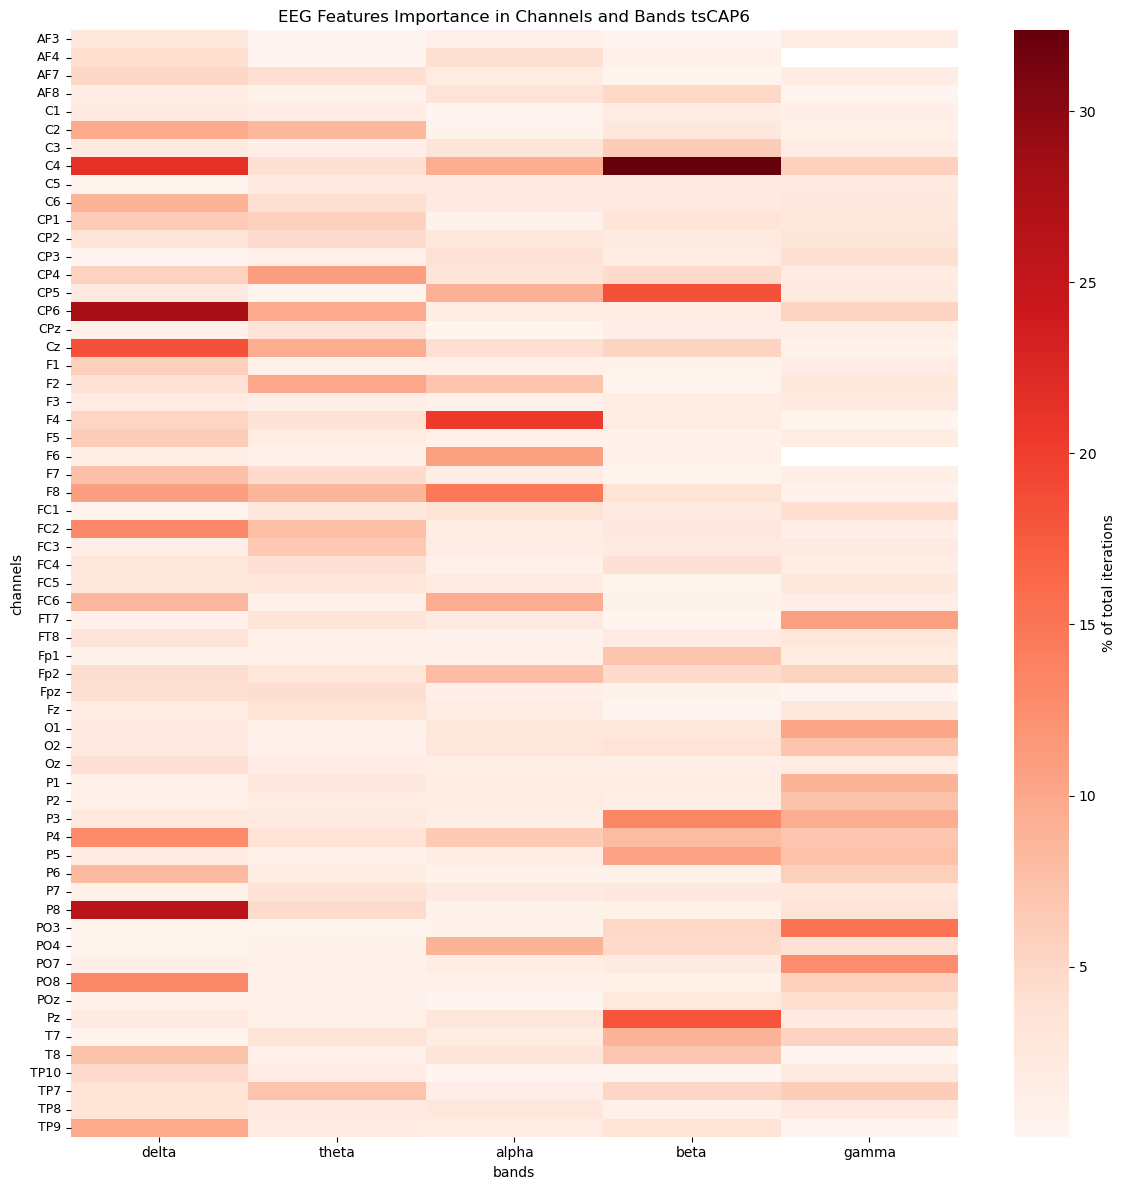

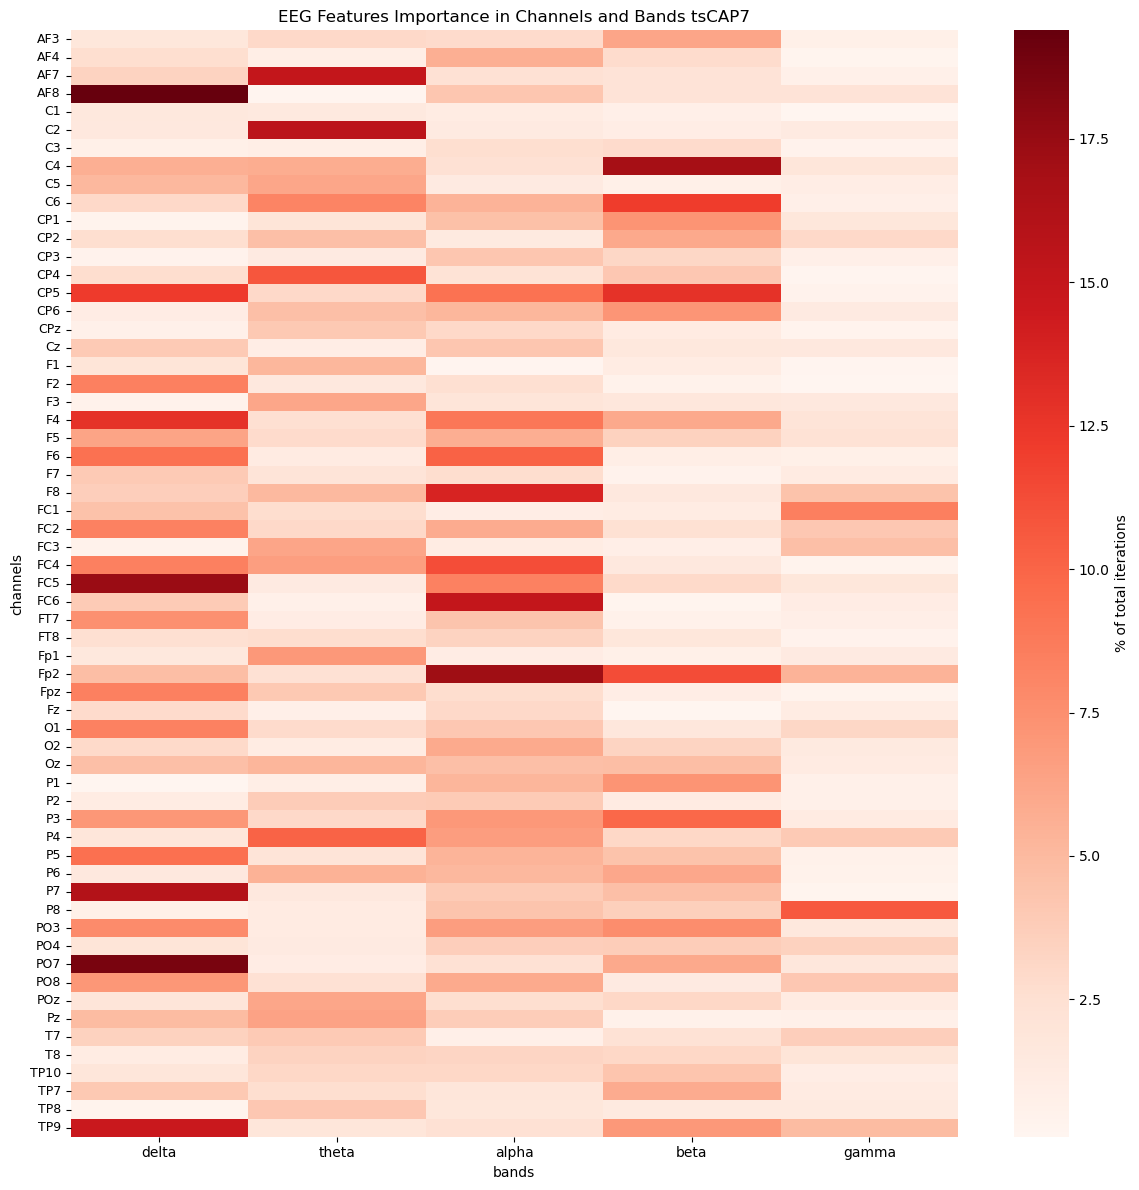

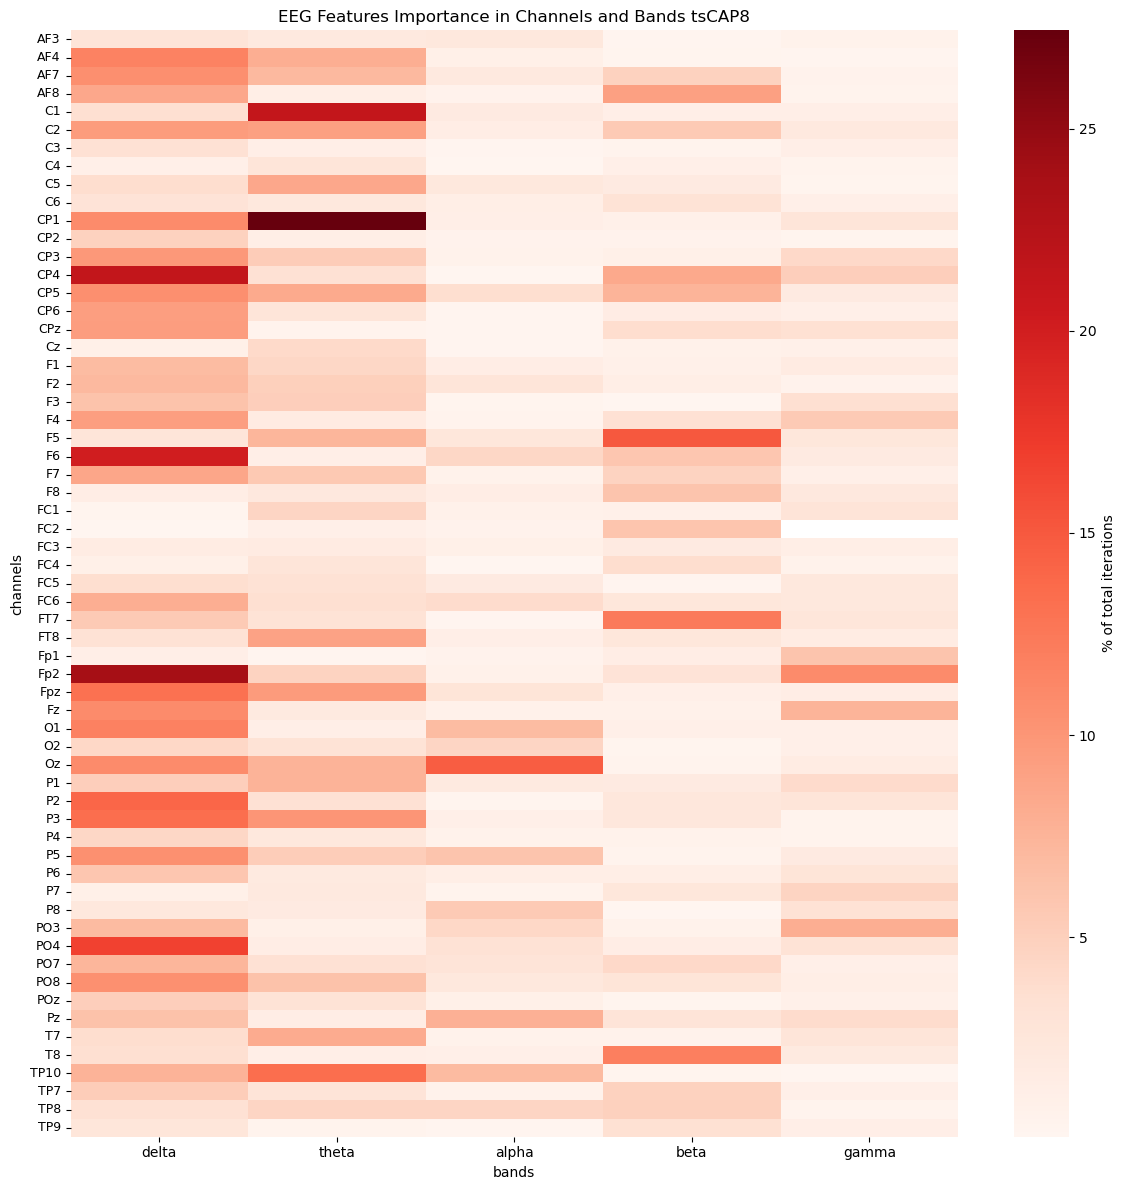

In [8]:
import numpy as np
for cap in gros_pd['ts_CAPS'].unique():
    petit_pd2 = gros_pd.loc[gros_pd['ts_CAPS'] == cap, ['eye_features','eeg_features_channel','eeg_features_band']]
    petit_pd2 = petit_pd2.dropna(axis = 0)
    all_channels = petit_pd2.eeg_features_channel.apply(lambda x: x[1:-1].replace("'","").replace(" ","").split(',') if x is not np.nan else [np.nan]).values
    all_bands = petit_pd2.eeg_features_band.apply(lambda x: x[1:-1].replace("'","").replace(" ","").split(',') if x is not np.nan else [np.nan]).values
    all_channels = np.concatenate(all_channels)
    all_bands = np.concatenate(all_bands)
    dict_for_df = {'channels':all_channels,
                'bands': all_bands}
    eeg_df = pd.DataFrame(dict_for_df)
    pivoted = eeg_df.groupby('bands').value_counts().to_frame().reset_index().pivot(
        columns = 'bands', 
        index = 'channels', 
        values = 'count',
                            ) * 100 / (28 * 10 * 27)
    figure = plt.figure(figsize=(12,12))
    sns.heatmap(pivoted.loc[:,['delta','theta','alpha','beta','gamma']],
                #xticklabels=['delta','theta','alpha','beta','gamma'],
                cmap = 'Reds',
                cbar_kws={'label':'% of total iterations',
                          }
                )
    plt.yticks(fontsize = 9)
    plt.title(f'EEG Features Importance in Channels and Bands {cap}')
    plt.tight_layout()
    plt.savefig(f'../figures/eeg_features_importance_{cap}.png')

In [7]:
gros_pd

,index,iteration,subject,session,run,task,ts_CAPS,pearson_r,eye_features,eeg_features_channel,eeg_features_band,nb_features
0,0,1,sub-01,ses-01,run-01,task-checker,tsCAP1,0.622747,['pupil_dilation'],NaN,NaN,1
1,1,1,sub-01,ses-01,run-01,task-checker,tsCAP2,0.499358,['first_derivative'],NaN,NaN,1
2,2,1,sub-01,ses-01,run-01,task-checker,tsCAP3,0.227599,['first_derivative'],NaN,NaN,1
3,3,1,sub-01,ses-01,run-01,task-checker,tsCAP4,0.378649,['pupil_dilation'],NaN,NaN,1
4,4,1,sub-01,ses-01,run-01,task-checker,tsCAP5,0.303291,['first_derivative'],NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2155,2155,10,sub-22,ses-02,run-01,task-checker,tsCAP6,0.254941,"['pupil_dilation', 'second_derivative', 'first...","['CP5', 'F4', 'C3', 'PO4', 'CP5', 'C3', 'POz',...","['alpha', 'alpha', 'alpha', 'alpha', 'gamma', ...",28
2156,2156,10,sub-22,ses-01,run-01,task-checker,tsCAP7,-0.004938,"['pupil_dilation', 'first_derivative', 'second...","['P3', 'CP1', 'CP2', 'Cz', 'P8', 'C4', 'P4', '...","['beta', 'gamma', 'gamma', 'beta', 'gamma', 'g...",28
2157,2157,10,sub-22,ses-02,run-01,task-checker,tsCAP7,0.167144,"['pupil_dilation', 'first_derivative', 'second...","['P3', 'CP1', 'CP2', 'Cz', 'P8', 'C4', 'P4', '...","['beta', 'gamma', 'gamma', 'beta', 'gamma', 'g...",28
2158,2158,10,sub-22,ses-01,run-01,task-checker,tsCAP8,-0.126097,"['pupil_dilation', 'first_derivative', 'second...","['Fp1', 'F4', 'F3', 'C3', 'FC6', 'F5', 'P7', '...","['gamma', 'gamma', 'gamma', 'gamma', 'gamma', ...",28


In [6]:
1000*100/(64 * 10 * 27) 

5.787037037037037

In [4]:
gros_pd[gros_pd['ts_CAPS'] == 'tsCAP1'].groupby(['subject','session']).mean('pearson_r').reset_index()

,subject,session,index,iteration,pearson_r,nb_features
0,sub-01,ses-01,0.000,10.0,0.464166,32.5
1,sub-02,ses-01,8.000,10.0,0.312473,32.5
2,sub-03,ses-01,16.000,10.0,0.963188,2.0
3,sub-05,ses-02,16.375,10.0,0.068786,32.5
4,sub-06,ses-01,24.375,10.0,0.188104,32.5
5,sub-06,ses-02,25.375,10.0,0.195728,32.5
6,sub-07,ses-01,40.375,10.0,0.205171,32.5
7,sub-07,ses-02,41.375,10.0,0.317275,32.5
8,sub-08,ses-01,56.375,10.0,-0.059265,32.5
9,sub-08,ses-02,57.375,10.0,0.247444,32.5


In [9]:
all_eyes = petit_pd2.eye_features.apply(lambda x: x[1:-1].replace("'","").replace(" ","").split(',')).values()

In [13]:
all_eyes = np.concatenate(all_eyes)
df_all_eyes = pd.DataFrame({'eye_features':all_eyes})


In [15]:
df_all_eyes.value_counts().reset_index().pivot(columns = 'eye_features')

count                                 
eye_features first_derivative pupil_dilation second_derivative
0                      5032.0            NaN               NaN
1                         NaN         5032.0               NaN
2                         NaN            NaN            5032.0

In [16]:
df_all_eyes

,eye_features
0,pupil_dilation
1,first_derivative
2,second_derivative
3,pupil_dilation
4,first_derivative
...,...
15091,second_derivative
15092,first_derivative
15093,pupil_dilation
15094,second_derivative
